IMPORT LIBRARIES

In [1]:
import tensorflow as tf

In [2]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import itertools
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration if plots that will be created

Import the Data From Excel

In [3]:
df= pd.read_csv(r'C:\Users\Temitope\Documents\University of Liverpool\PhD\July 2023\Machine Learning\New Data\Combined\Valaski.csv')

Check the Data

In [4]:
df.head()

,Diameter,Height,Concrete_Modulus,Unconfined_Strain,Unconfined_Strength,FRP_Overall_Thickness,Fibre_Modulus,Rupture_Strain,Confining_Stress,Stiffness_Ratio,Strain_Ratio,Confined_Strength,Confined_Strain
0,150.0,300.0,28320.83685,0.24,42.00,0.12,240000,0.38,145.9200,0.833829,1.583333,46.00,0.92
1,150.0,300.0,28320.83685,0.24,42.00,0.35,240000,0.88,985.6000,5.632000,3.666667,77.00,2.12
2,150.0,300.0,28320.83685,0.24,42.00,0.70,240000,1.32,2956.8000,16.896000,5.500000,108.00,3.16
3,160.0,320.0,22252.69909,0.27,25.93,0.13,238000,1.31,506.6425,5.275491,4.851852,39.63,1.28
4,160.0,320.0,22252.69909,0.27,25.93,0.39,238000,1.32,1531.5300,15.947285,4.888889,66.14,1.52


In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Diameter - 0.0%
Height - 0.0%
Concrete_Modulus - 0.0%
Unconfined_Strain - 0.0%
Unconfined_Strength - 0.0%
FRP_Overall_Thickness - 0.0%
Fibre_Modulus - 0.0%
Rupture_Strain - 0.0%
Confining_Stress - 0.0%
Stiffness_Ratio - 0.0%
Strain_Ratio - 0.0%
Confined_Strength - 0.0%
Confined_Strain - 0.0%


In [6]:
df.dtypes

Diameter                 float64
Height                   float64
Concrete_Modulus         float64
Unconfined_Strain        float64
Unconfined_Strength      float64
FRP_Overall_Thickness    float64
Fibre_Modulus              int64
Rupture_Strain           float64
Confining_Stress         float64
Stiffness_Ratio          float64
Strain_Ratio             float64
Confined_Strength        float64
Confined_Strain          float64
dtype: object

Correlation Matrix Heat Map

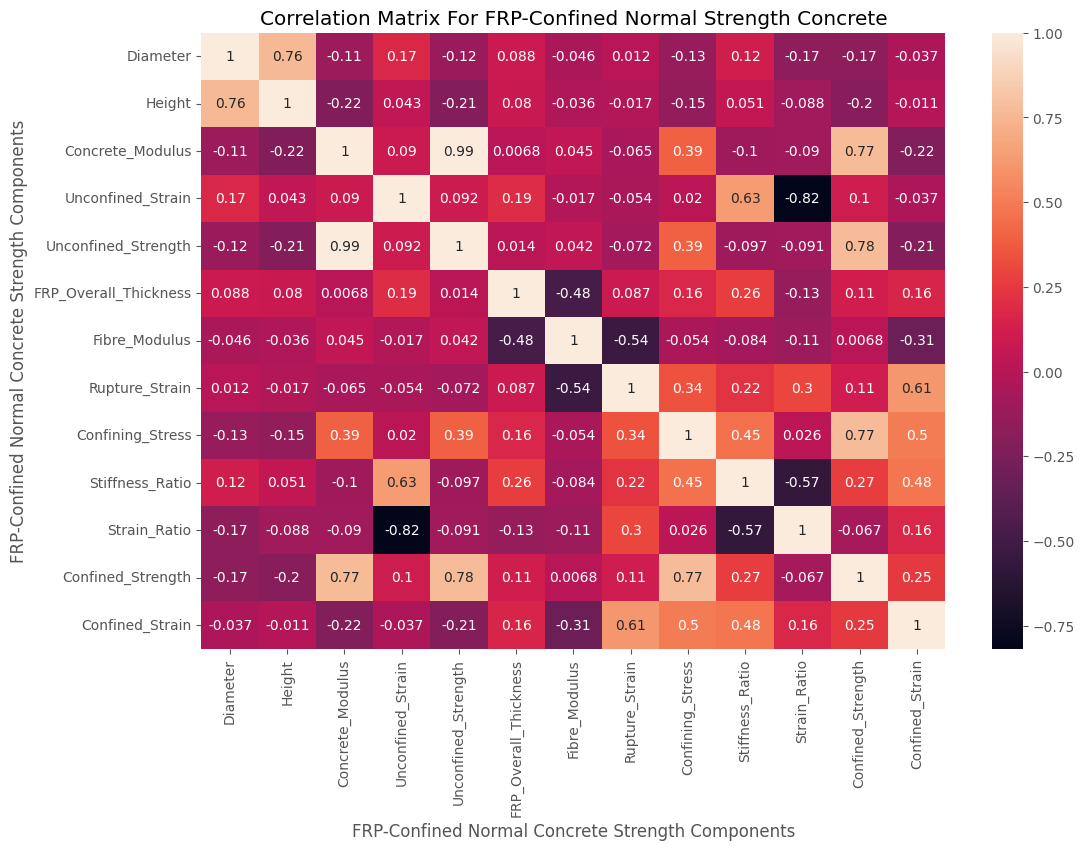

In [7]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix For FRP-Confined Normal Strength Concrete')
plt.xlabel('FRP-Confined Normal Concrete Strength Components')
plt.ylabel('FRP-Confined Normal Concrete Strength Components')
plt.show()

MULTIVARIATE ANALYSIS

In [8]:
# Displot
fig, ax2 = plt.subplots(3,3,figsize = (16,16))
sns.distplot(df['Diameter'],ax=ax2[0][0])
sns.distplot(df['Height'],ax=ax2[0][1])
sns.distplot(df['Unconfined_Strength'],ax=ax2[0][2])
sns.distplot(df['Unconfined_Strain'],ax=ax2[1][0])
sns.distplot(df['Fibre_Modulus'],ax=ax2[1][1])
sns.distplot(df['FRP_Tensile'],ax=ax2[1][2])
sns.distplot(df['FRP_Overall_Thickness'],ax=ax2[2][0])
sns.distplot(df['FRP_Layer_No'],ax=ax2[2][1])
sns.distplot(df['Confined_Strength'],ax=ax2[2][2])

PRE-PROCESSING THE DATA

Normalising the Data

In [9]:
from sklearn import preprocessing
cols=df.columns
df1 = pd.DataFrame(df)
df1

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df1)
df1_normalized = pd.DataFrame(np_scaled, columns = cols)
df1_normalized
df1_normalized.head()

,Diameter,Height,Concrete_Modulus,Unconfined_Strain,Unconfined_Strength,FRP_Overall_Thickness,Fibre_Modulus,Rupture_Strain,Confining_Stress,Stiffness_Ratio,Strain_Ratio,Confined_Strength,Confined_Strain
0,0.389764,0.243542,0.230793,0.378943,0.144675,0.000672,0.370079,0.092949,0.012682,0.034773,0.000883,0.069767,0.113145
1,0.389764,0.243542,0.230793,0.378943,0.144675,0.016118,0.370079,0.253205,0.108307,0.235987,0.002405,0.181713,0.312812
2,0.389764,0.243542,0.230793,0.378943,0.144675,0.039624,0.370079,0.394231,0.332792,0.708349,0.003744,0.293659,0.485857
3,0.429134,0.268143,0.067626,0.426716,0.037040,0.001343,0.366929,0.391026,0.053762,0.221037,0.003271,0.046764,0.173045
4,0.429134,0.268143,0.067626,0.426716,0.037040,0.018805,0.366929,0.394231,0.170479,0.668564,0.003298,0.142496,0.212978


Check for Correlation Again

In [10]:
correlation_matrix = df1_normalized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix For FRP-Confined Normal Strength Concrete')
plt.xlabel('FRP-Confined Normal Concrete Strength Components')
plt.ylabel('FRP-Confined Normal Concrete Strength Components')
plt.show()

Check for Multivariate Again

In [11]:

fig, ax2 = plt.subplots(3,3,figsize = (16,16))
sns.distplot(df1_normalized['Diameter'],ax=ax2[0][0])
sns.distplot(df1_normalized['Height'],ax=ax2[0][1])
sns.distplot(df1_normalized['Unconfined_Strength'],ax=ax2[0][2])
sns.distplot(df1_normalized['Unconfined_Strain'],ax=ax2[1][0])
sns.distplot(df1_normalized['Fibre_Modulus'],ax=ax2[1][1])
sns.distplot(df1_normalized['FRP_Tensile'],ax=ax2[1][2])
sns.distplot(df1_normalized['FRP_Overall_Thickness'],ax=ax2[2][0])
sns.distplot(df1_normalized['FRP_Layer_No'],ax=ax2[2][1])
sns.distplot(df1_normalized['Confined_Strength'],ax=ax2[2][2])

ANN MODEL

Strength Model

In [12]:
x=df1_normalized.drop('Confined_Strength',axis=1)
y=df1_normalized['Confined_Strength']

In [13]:
import sklearn
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

xscaled=x.apply(zscore)
xscaled_data=pd.DataFrame(xscaled,columns=df1_normalized.columns)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(xscaled,y,test_size=0.2, random_state = 1)

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation="relu", input_shape=(12,)),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1, activation="linear")
])

Adam Optimzer

In [16]:
from tensorflow.keras.optimizers import Adam

# Create an Adam optimizer with a learning rate of 0.01 and a decay rate of 0.9.
optimizer = Adam(learning_rate=0.01, decay=0.9)

Compiling the ANN Model

In [17]:
model.compile(optimizer=optimizer, loss="mse")

Training the ANN Model

In [18]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 3ms/step - loss: 0.0861
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 6/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 8/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 9/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 10/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 11/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 12/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 13/500
22/22 [=================

22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 203/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 204/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 205/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 206/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 207/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 208/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 209/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 210/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 211/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 212/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 213/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 214/500
22/22 [=========

22/22 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 303/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 304/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 305/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 306/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 307/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 308/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 309/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 310/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 311/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 312/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 313/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 314/500
22/22 [=========

22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 403/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 404/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 405/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 406/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 407/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 408/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 409/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 410/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 411/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 412/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 413/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 414/500
22/22 [=========

Strength Prediction with ANN Model

In [19]:
predictions = model.predict(x_test).flatten()

# Print the predictions
print(predictions)

6/6 [==============================] - 0s 2ms/step
[0.0243571  0.1120379  0.6516349  0.0881708  0.47712943 0.64889234
 0.04751328 0.22374815 0.07821334 0.2774668  0.17358238 0.08718105
 0.4723222  0.13200855 0.14264715 0.5461033  0.06433666 0.2466397
 0.08881954 0.4427783  0.4416038  0.29758322 0.18587191 0.5650349
 0.0686023  0.22742952 0.1866706  0.26852712 0.13625516 0.17228462
 0.09388824 0.21523634 0.2693106  0.5069823  0.18887527 0.5346388
 0.6134588  0.1934857  0.12639233 0.43799618 0.55833584 0.25169906
 0.17819706 0.2362279  0.13695803 0.19894704 0.16216478 0.2837367
 0.35674968 0.36813015 0.3850798  0.12383243 0.19785407 0.09615764
 0.09199957 0.4092782  0.2423355  0.5278471  0.06191386 0.48267886
 0.358184   0.15248242 0.20075446 0.3100294  0.1157039  0.3744806
 0.16499814 0.09530892 0.19472724 0.10771377 0.32582396 0.51817286
 0.09584197 0.660376   0.1933469  0.31395072 0.17149517 0.23028848
 0.6297896  0.07306025 0.42662892 0.18773451 0.14541915 0.19160435
 0.4486636  0.09

Accuracy Testing

In [20]:
# R_Square
import sklearn.metrics as metrics
acc_DT = metrics.r2_score(y_test, predictions)
acc_DT

0.9120535683349091

In [21]:
# Mean Square Error
mse=metrics.mean_squared_error(y_test, predictions)
print(mse)

0.002338222493218989


In [22]:
# Root Mean Square Error
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.048355170284251806


In [23]:
# Mean Absolute Error
mean_absolute_error(y_test, predictions)

0.035496644548487395

In [24]:
# Mean Absolute Percentage Error
mean_absolute_percentage_error(y_test, predictions)

0.20062028193798803

In [25]:
# # Coefficient of Variation
# x=np.mean(predictions)
# stand_x = np.std(predictions)
# cov=(x/stand_x)*100
# cov

In [26]:
y_test

654    0.043045
56     0.140546
481    0.555467
84     0.110935
590    0.503828
         ...   
544    0.374910
202    0.142352
255    0.061823
320    0.137188
551    0.492633
Name: Confined_Strength, Length: 172, dtype: float64

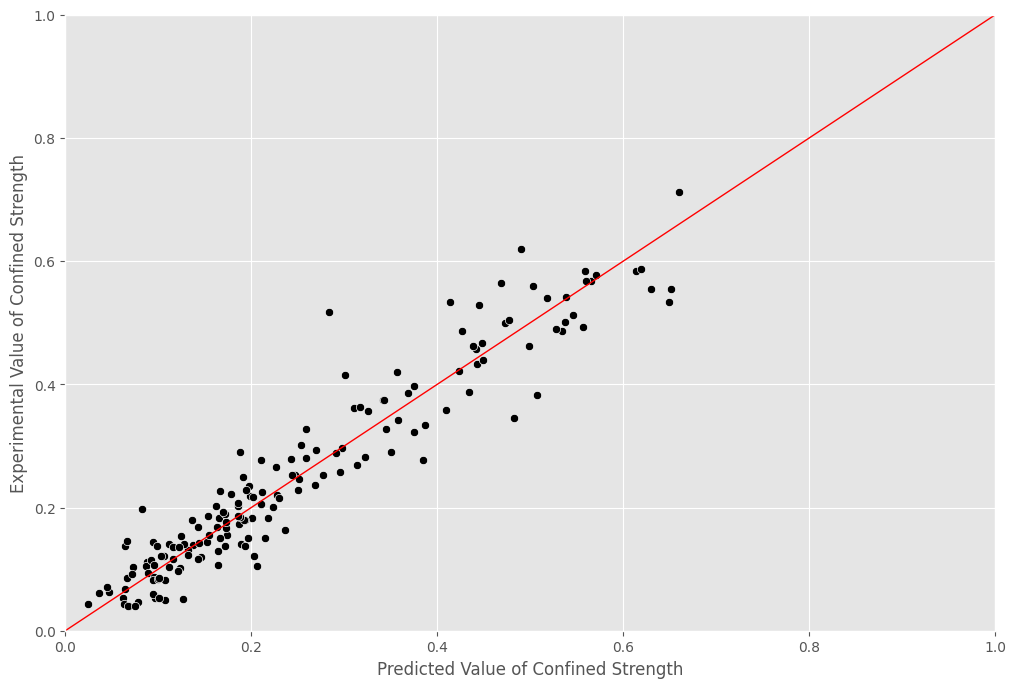

In [27]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=predictions, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Confined Strength")
ax.set_ylabel("Experimental Value of Confined Strength")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show() 

Strain Model

In [28]:
x=df1_normalized.drop('Confined_Strain',axis=1)
y=df1_normalized['Confined_Strain']

In [29]:
import sklearn
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

xscaled=x.apply(zscore)
xscaled_data=pd.DataFrame(xscaled,columns=df1_normalized.columns)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(xscaled,y,test_size=0.2, random_state = 1)

In [31]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation="relu", input_shape=(12,)),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1, activation="linear")
])

In [32]:
from tensorflow.keras.optimizers import Adam

# Create an Adam optimizer with a learning rate of 0.01 and a decay rate of 0.9.
optimizer = Adam(learning_rate=0.01, decay=0.9)

Compiling the ANN Model

In [33]:
model.compile(optimizer=optimizer, loss="mse")

Training the ANN Model

In [34]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 3ms/step - loss: 0.0726
Epoch 2/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 3/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 4/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 6/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 7/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 8/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 9/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 10/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 11/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 12/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 13/500
22/22 [=================

22/22 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 203/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 204/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 205/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 206/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 207/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 208/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 209/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 210/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 211/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 212/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 213/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 214/500
22/22 [=========

22/22 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 303/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 304/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 305/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 306/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 307/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 308/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 309/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 310/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 311/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 312/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 313/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 314/500
22/22 [=========

22/22 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 403/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 404/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 405/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 406/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 407/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 408/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 409/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 410/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 411/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 412/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 413/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 414/500
22/22 [=========

In [35]:
print(model.evaluate(x_train, y_train))

22/22 [==============================] - 0s 3ms/step - loss: 0.0043
0.004293171688914299


Strain Prediction with ANN Model

In [37]:
predictions=model.predict(x_test).flatten()

# Print the predictions
print(predictions)

6/6 [==============================] - 0s 2ms/step
[0.20723377 0.14522417 0.33351833 0.19335753 0.30691355 0.27675182
 0.09304918 0.15705135 0.15460499 0.31116545 0.2927708  0.37327957
 0.3010127  0.20129977 0.08983731 0.25473484 0.12465141 0.2771665
 0.1153978  0.15221664 0.2417767  0.23497279 0.25501698 0.44468462
 0.15047424 0.44986284 0.5269597  0.26272148 0.24543802 0.10076001
 0.23044634 0.74401265 0.3789189  0.28288907 0.32983673 0.58166105
 0.47794402 0.25529504 0.0760738  0.24815293 0.28011966 0.5293569
 0.19065909 0.27694798 0.12423125 0.33372575 0.17752504 0.25324875
 0.02901335 0.25253028 0.01153859 0.09721495 0.7046591  0.22390027
 0.30380237 0.23324507 0.4500926  0.25808507 0.19962235 0.12761553
 0.19989915 0.4008522  0.59833366 0.2667308  0.03767231 0.0402365
 0.38136613 0.25250888 0.31680655 0.02519541 0.0805954  0.39320385
 0.2436624  0.47316098 0.46970654 0.08682446 0.5791386  0.5069554
 0.28223294 0.09614575 0.11837543 0.13253103 0.10356109 0.20651989
 0.29170424 0.3

Accuracy Testing

In [38]:
# R_Square
import sklearn.metrics as metrics
acc_DT = metrics.r2_score(y_test, predictions)
acc_DT

0.8597505573900749

In [39]:
# Mean Square Error
mse=metrics.mean_squared_error(y_test, predictions)
print(mse)

0.0033915180005482763


In [40]:
# Root Mean Square Error
rmse=math.sqrt(mse)
print("RMSE",rmse)

RMSE 0.05823674098495104


In [41]:
# Mean Absolute Error
mean_absolute_error(y_test, predictions)

0.04342785018939443

In [42]:
# Mean Absolute Percentage Error
mean_absolute_percentage_error(y_test, predictions)

0.30039056575546486

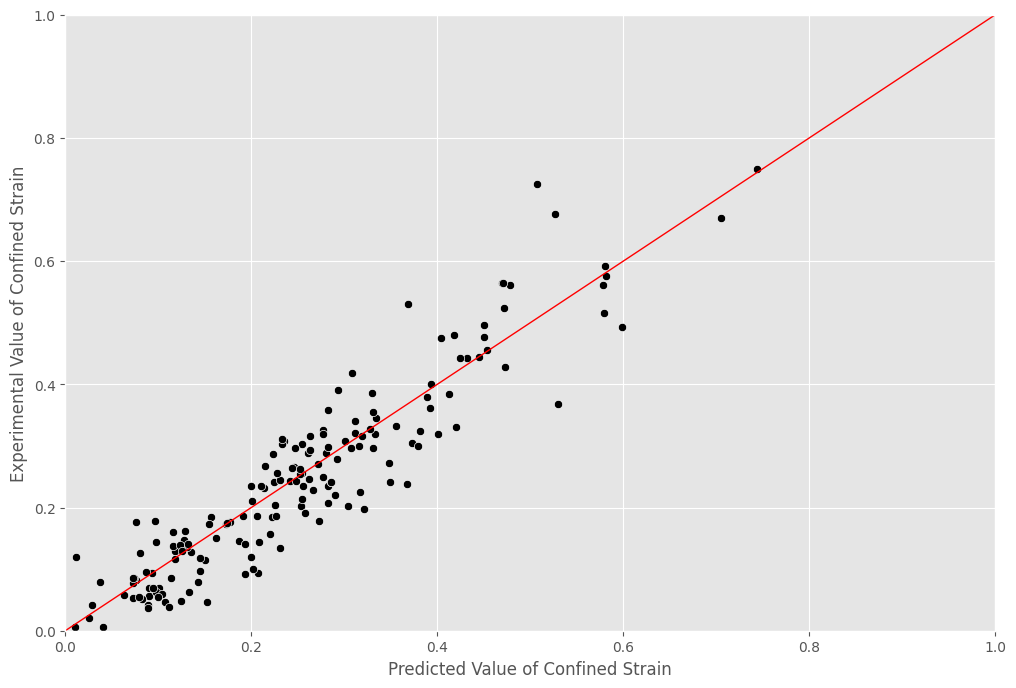

In [43]:
y_min = y.min()
y_max = y.max()

ax = sns.scatterplot(x=predictions, y=y_test, color='k')
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted Value of Confined Strain")
ax.set_ylabel("Experimental Value of Confined Strain")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show() 